# polynomial regression

In [25]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

### select file data

In [31]:
file_path = r'C:\Users\Administrator\Downloads\Project\BCSMASS\BCSMASS 2010-2023.xlsx'
dataset = pd.read_excel(file_path)

## Handling missing values

In [35]:
columns_to_impute = ['BCSMASS 2011', 'BCSMASS 2012', 'BCSMASS 2013', 'BCSMASS 2014',
                 'BCSMASS 2015', 'BCSMASS 2016', 'BCSMASS 2017', 'BCSMASS 2018', 'BCSMASS 2019', 'BCSMASS 2020',
                     ]

output_cols = 'BCSMASS 2021'

### Instantiate the SimpleImputer with the desired strategy (e.g., mean, median, most_frequent)

In [36]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='mean')

### Fit and transform the imputer on the specified columns

In [37]:
dataset[columns_to_impute] = imputer.fit_transform(dataset[columns_to_impute])

## selecting the dependent and independent variables

In [38]:
X = dataset[columns_to_impute].values
y = dataset[output_cols].values

## normalize x and y variables 

In [39]:
from sklearn.preprocessing import MinMaxScaler
scaler_x = MinMaxScaler()
scaler_y = MinMaxScaler()
X_scaled = scaler_x.fit_transform(X)
y_scaled = scaler_y.fit_transform(y.reshape(-1, 1)).flatten()

## split into training and test set 

In [40]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size=0.2, random_state=0)

## use the polynomial regression model 

In [41]:
# Training the Polynomial Regression model on the whole dataset
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
model = PolynomialFeatures(degree = 4)
X_poly = model.fit_transform(X_train)
lin_reg_2 = LinearRegression()
lin_reg_2.fit(X_poly, y_train)

LinearRegression()

In [42]:
Prediction = lin_reg_2.predict(X_poly)

print (Prediction)

[0.07320449 0.05527827 0.0350509  ... 0.05392579 0.10890135 0.08790102]


In [43]:
train_predictions = lin_reg_2.predict(X_train)
test_predictions = lin_reg_2.predict(X_test)

ValueError: X has 10 features, but LinearRegression is expecting 1001 features as input.

In [21]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
Train_R_squared = r2_score(y_train, train_predictions)
Train_MSR = mean_squared_error(y_train, train_predictions)
Train_MAE = mean_absolute_error(y_train, train_predictions)

NameError: name 'train_predictions' is not defined

In [ ]:
print ('Train_R-squared score', Train_R_squared)
print ('Train_Mean squared error', Train_MSR)
print ('Train_Mean absolute error', Train_MAE)

ValueError: x and y must be the same size

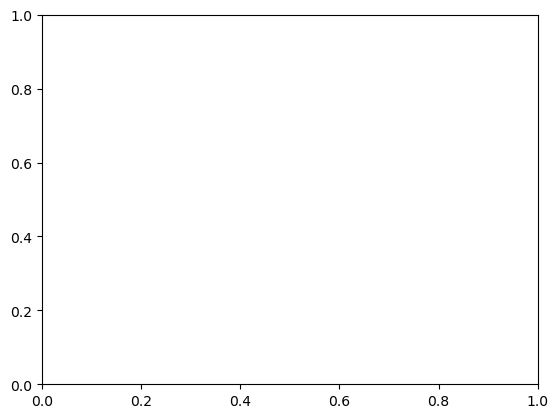

In [22]:
# Visualising the Polynomial Regression results
plt.scatter(X, y, color = 'red', label = 'Actual Values vs Predicted Values')
plt.plot(X, lin_reg_2.predict(X_poly.fit_transform(X)), color = 'blue', label = 'Fit line y = 0.1054*x + 0.0243')
plt.title('Random Forest Regression: Actual BCSMASS vs. Predicted BCSMASS')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values ')
plt.legend()
plt.show()